In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

In [2]:
topology = paths.engines.toy.Topology(n_spatial=3, 
                                      n_atoms=2, 
                                      masses=np.array([2.0, 8.0]), 
                                      pes=None)
initial_snapshot = paths.engines.toy.Snapshot(
    coordinates=np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]),
    velocities=np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]),
    topology=topology
)

In [3]:
modifier_1 = paths.RandomVelocities(beta=1.0)
modifier_5 = paths.RandomVelocities(beta=1.0/5.0)

In [4]:
snapshots_1 = [modifier_1(initial_snapshot) for i in range(10000)]
snapshots_5 = [modifier_5(initial_snapshot) for i in range(10000)]

In [5]:
v_1_0 = sum([s.velocities[0].tolist() for s in snapshots_1], [])
v_1_1 = sum([s.velocities[1].tolist() for s in snapshots_1], [])
v_5_0 = sum([s.velocities[0].tolist() for s in snapshots_5], [])
v_5_1 = sum([s.velocities[1].tolist() for s in snapshots_5], [])

(array([ 0.00180541,  0.01236433,  0.06751143,  0.23284331,  0.4342287 ,
         0.48095055,  0.28881105,  0.10148598,  0.01887475,  0.00240721]),
 array([-3.12018174, -2.51090219, -1.90162264, -1.29234309, -0.68306354,
        -0.073784  ,  0.53549555,  1.1447751 ,  1.75405465,  2.3633342 ,
         2.97261375]),
 <a list of 10 Patch objects>)

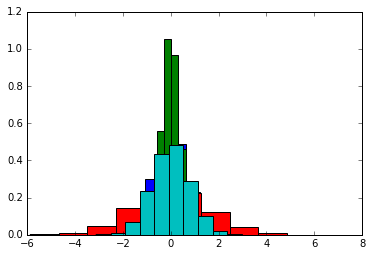

In [6]:
plt.hist(v_1_0, normed=True)
plt.hist(v_1_1, normed=True)
plt.hist(v_5_0, normed=True)
plt.hist(v_5_1, normed=True)